## Exploratory data analysis and predictive model to predict survival of passengers on the Titanic; based on the legendary kaggle sinking of the 'Unsinkable' Titanic ship dataset.
This dataset, provided by kaggle contains information about passengers that boarded the ship -- their ages, sexes, sibling and parents counts, embarkment points, fare and whether or not they survived. <br>
* I would explore possible correlations between some factors that might be responsible in determining the fate of a passenger, i.e. whether they are likely to survive or not.
* I would also train various machine learning models to ultimately be able to predict the fate of a passenger given some input variables.


##### Importing the necessary libraries and packages for exploratory data analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
sb.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4

##### Importing the dataset

In [2]:
titanic_training = pd.read_csv('train.csv')

In [3]:
titanic_training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Dataset Description
* Survived - If the passenger survived or not (0 = No; 1 = Yes)<br>
* Pclass - Passenger socio-economic class (1 = Upper; 2 = Middle; 3 = Lower)<br>
* Name - Name of the passenger<br>
* Sex - Sex of the passenger (male or female) <br>
* Age - Age of the passenger <br>
* SibSp - Number of Siblings/Spouses the passenger had aboard<br>
* Parch - Number of Parents/Children the passenger had aboard<br>
* Ticket - Ticket number<br>
* Fare - Passenger fare (British pound)<br>
* Cabin - Cabin number indicating the cabin the passenger was on <br>
* Embarked - Port of embarkation (C = Cherbourg, France; Q = Queenstown, UK; S = Southampton - Cobh, Ireland)

##### Wrangling the dataset to check for completeness and general tidiness

In [4]:
titanic_training.shape

(891, 12)

* The dataset contains 891 rows (Total number of passengers aboard) and 12 columns (Passenger attributes). 

In [5]:
titanic_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Infromation about some passengers age, what cabin they were on and where they embarked from have not been provided

In [6]:
titanic_training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic_training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From analyzing the central tendency and dispersion of the dataset, most passengers belong to the lower socio-economic class, and as expected, mostly adults were on the ship. The ticket fare paid by a couple of passengers look to be considerably more than the average fare price but at least half of the passengers paid ~14.5 british pounds.

##### Analyzing variables and dropping irrelevant ones
- Pclass - Does a passenger's class on the boat affect their survivability? - Probably
- Sex - Could a passenger's gender impact their survival rate? - Probably
- Age - Does a person's age impact their survival rate? - Probably
- SibSp - Does the number of relatives on the boat (that are siblings or a spouse) affect a person survivability? - Probably
- Parch - Does the number of relatives on the boat (that are children or parents) affect a person survivability? - Probably
- Fare - Does the fare a person paid effect his survivability? - Maybe, Position on the ship. Relevant
- Embarked - Does a person's point of embarkation matter? - Probably determines how the ship was filled.

- What about a person's Name, Ticket number, and passenger ID? They're all irrelavant for predicting survivability.
- The cabin variable is almost all missing values so it must be dropped.

In [8]:
titanic_training = titanic_training.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
titanic_training.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


##### Verifying the focus variable (dependent) is binary and represnts 2 outcomes (Survived [1] or Not Survived[0])

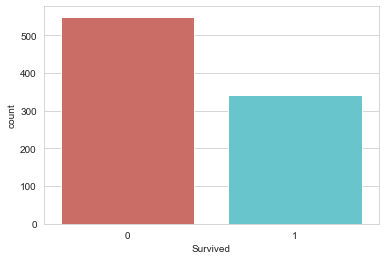

In [9]:
sb.countplot(x = 'Survived', data = titanic_training, palette='hls')

In [10]:
titanic_training['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
survived = titanic_training.Survived[titanic_training['Survived'] == 1].value_counts() * 100 / titanic_training['Survived'].count()
not_survived = titanic_training.Survived[titanic_training['Survived'] == 0].value_counts() * 100 / titanic_training['Survived'].count()
survived_stat = "{:.1f}% of the passengers survived compared to {:.1f}% that did not.".format(survived[1],not_survived[0])
print(survived_stat)

38.4% of the passengers survived compared to 61.6% that did not.


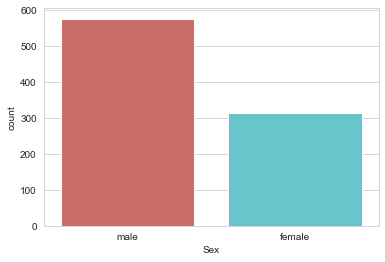

In [12]:
sb.countplot(x = 'Sex', data = titanic_training, palette='hls')

In [13]:
titanic_training['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

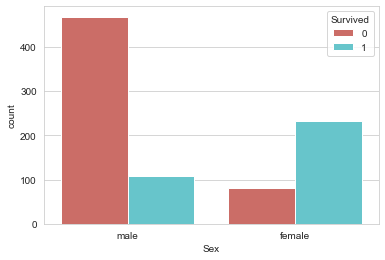

In [14]:
sb.countplot(x = 'Sex', hue = 'Survived', data = titanic_training, palette='hls')

In [15]:
titanic_training[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
len(titanic_training[(titanic_training['Sex'] == 'male') & (titanic_training['Survived'] == 0)])
#count of males that DID NOT survive

468

In [17]:
len(titanic_training[(titanic_training['Sex'] == 'male') & (titanic_training['Survived'] == 1)])
#count of males that survived

109

In [18]:
len(titanic_training[(titanic_training['Sex'] == 'female') & (titanic_training['Survived'] == 0)])
#count of females that DID NOT survive

81

In [19]:
len(titanic_training[(titanic_training['Sex'] == 'female') & (titanic_training['Survived'] == 1)])
#count of females that survived

233

- 81% of the males that were on the ship did not survive
- 26% of the females on the ship did not survive

Although there were significantly more males on the ship, their survival rate of just 19% highly contrasts the 74% of females.

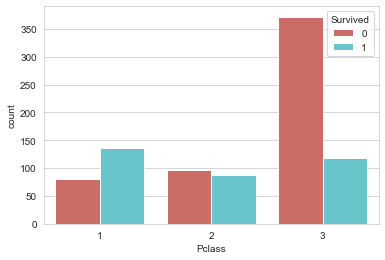

In [20]:
sb.countplot(x = 'Pclass', hue = 'Survived', data = titanic_training, palette='hls')

In [21]:
titanic_training['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [22]:
titanic_training[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [23]:
print(len(titanic_training[(titanic_training['Pclass'] == 1) & (titanic_training['Survived'] == 0)]))
print(len(titanic_training[(titanic_training['Pclass'] == 1) & (titanic_training['Survived'] == 1)]))

80
136


In [24]:
print(len(titanic_training[(titanic_training['Pclass'] == 2) & (titanic_training['Survived'] == 0)]))
print(len(titanic_training[(titanic_training['Pclass'] == 2) & (titanic_training['Survived'] == 1)]))

97
87


In [25]:
print(len(titanic_training[(titanic_training['Pclass'] == 3) & (titanic_training['Survived'] == 0)]))
print(len(titanic_training[(titanic_training['Pclass'] == 3) & (titanic_training['Survived'] == 1)]))

372
119


- 63% of passengers belonging to the Upper class survived compared to 47% and 24% of passengers belonging to the middle class and lower class respectively.

Interesting to note that between the three socio-economic classes, the Upper class has the highest surival rate. <br>
- Could their socio-economic status have had an impact on their ticket fare prices and their positions (cabin) in the ship being more secure than other parts of the ship?

In [26]:
Pclass = titanic_training[(titanic_training['Pclass'] == 1) & (titanic_training['Survived'] == 1)]

In [27]:
Pclass.sort_values(by='Fare', ascending=False).head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35.0,0,0,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
341,1,1,female,24.0,3,2,263.0000,S
88,1,1,female,23.0,3,2,263.0000,S


In [28]:
Pclass.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,136.0,136.0,122.000000,136.000000,136.000000,136.000000
mean,1.0,1.0,35.368197,0.492647,0.389706,95.608029
std,0.0,0.0,13.760017,0.632412,0.690387,85.286820
min,1.0,1.0,0.920000,0.000000,0.000000,25.929200
25%,1.0,1.0,24.250000,0.000000,0.000000,50.985450
50%,1.0,1.0,35.000000,0.000000,0.000000,77.958300
75%,1.0,1.0,45.000000,1.000000,1.000000,111.481225
max,1.0,1.0,80.000000,3.000000,2.000000,512.329200


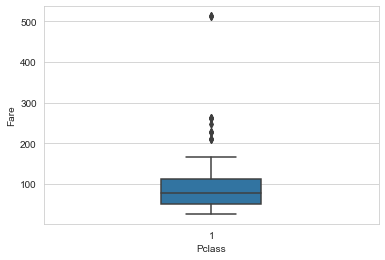

In [29]:
sb.boxplot(x = 'Pclass', y = 'Fare', data = Pclass, width=0.3)

- It is evident that there is a direct correlation between the fare prices and the socio-economic class. 50% of passengers belonging to the Upper class paid at least 77 british pounds or more and 95 pounds on the average. This is more than the 32 british pounds paid on the average for all passengers on the ship. There are also a few outliers that show that the highest fare prices were paid by passengers belonging to this class, thereby solidifying the assumption that passengers of this class can afford to pay more and are placed in more 'secure' cabins.

##### Taking care of missing values
The Age variable is missing 177 records and dropping this number of passengers would heavily impact the model's predictive performance. I would explore the other variables in relation to the age in order to find a good approximation.

##### Age vs Pclass

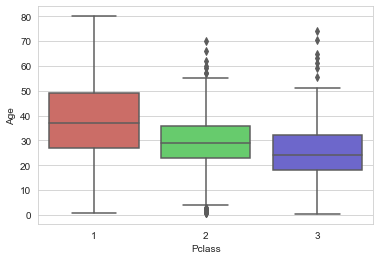

In [30]:
sb.boxplot(x = 'Pclass', y = 'Age', data = titanic_training, palette='hls')

##### Age vs SibSp

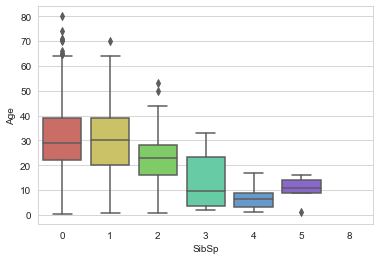

In [31]:
sb.boxplot(x = 'SibSp', y = 'Age', data = titanic_training, palette='hls')

##### Age vs Parch

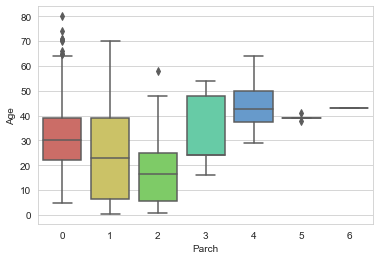

In [32]:
sb.boxplot(x = 'Parch', y = 'Age', data = titanic_training, palette='hls')

- The older a person is, the more likely they are to have 4 individuals on the ship who are either parents or children. This is good enough to make approximations of the age of a passenger based on the Parch.

In [33]:
#Infer using the mean age values depending on the Parch category
Parch_groups = titanic_training.groupby(titanic_training['Parch'])
Parch_groups.mean()

,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,
0,0.343658,2.321534,32.178503,0.237463,25.586774
1,0.550847,2.203390,24.422000,1.084746,46.778180
2,0.500000,2.275000,17.216912,2.062500,64.337604
3,0.600000,2.600000,33.200000,1.000000,25.951660
4,0.000000,2.500000,44.500000,0.750000,84.968750
5,0.200000,3.000000,39.200000,0.600000,32.550000
6,0.000000,3.000000,43.000000,1.000000,46.900000


In [34]:
def age_approx(cols):
    Age = cols[0]
    Parch = cols[1]
    
    if pd.isnull(Age):
        if Parch == 0:
            return 32
        elif Parch == 1:
            return 24
        elif Parch == 2:
            return 17
        elif Parch == 3:
            return 33
        elif Parch == 4:
            return 45
        else:
            return 30
        
    else:
        return Age

In [35]:
titanic_training['Age'] = titanic_training[['Age', 'Parch']].apply(age_approx, axis=1)
titanic_training.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

- Just 2 records are missing from the Embarked variable, both passengers would be dropped from the dataset

In [36]:
titanic_training.dropna(inplace=True)
titanic_training.reset_index(inplace=True, drop=True)
titanic_training.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

##### Converting categorical variables
To build a predictive model, all independent variables need to be of a consistent form. i.e. Binary. Sex and Embarked variables are categorical and need to be encoded.

##### Sex

In [37]:
titanic_training['Sex'][0:5]

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [38]:
from sklearn.preprocessing import LabelEncoder as le
label_encoder = le()
titanic_training['Sex'] = label_encoder.fit_transform(titanic_training['Sex'])
titanic_training['Sex'][0:5]
# 1 = male / 0 = female

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

- Sex variable has now been encoded with 1 representing male and 0 representing female

##### Embarked

In [39]:
titanic_training['Embarked'] = titanic_training['Embarked'].astype(str)

In [40]:
titanic_training['Embarked'][0:6]

0    S
1    C
2    S
3    S
4    S
5    Q
Name: Embarked, dtype: object

In [41]:
embarked_cat = titanic_training['Embarked']
embarked_encoded = label_encoder.fit_transform(embarked_cat)
embarked_encoded[0:6]

array([2, 0, 2, 2, 2, 1])

- Embarked variable has now been encoded with 0 representing passengers that embarked from Cherbourg(C), 1 representing passengers that embarked from Queenstown(Q) and 2 for passengers from Southampton (S).

In [42]:
titanic_training['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

##### Further transforming the Embarked variable to contain just 1 and 0 since there are three unique attributes

In [43]:
from sklearn.preprocessing import OneHotEncoder
binary_encoder = OneHotEncoder(categories='auto')
embarked_1hot = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1))
embarked_1hot_mat = embarked_1hot.toarray()
embarked_df = pd.DataFrame(embarked_1hot_mat, columns = ['C', 'Q', 'S'])
embarked_df.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [44]:
titanic_final = pd.concat([titanic_training, embarked_df], axis=1, verify_integrity=True)
titanic_final[0:6]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,1,22.0,1,0,7.2500,S,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,C,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,S,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,S,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,S,0.0,0.0,1.0
5,0,3,1,32.0,0,0,8.4583,Q,0.0,1.0,0.0


- The original Embarked can now be dropped since it is now equally represented using C, Q, S

In [45]:
titanic_final.drop(['Embarked'], axis=1, inplace=True)
titanic_final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0


In [46]:
titanic_final[['Survived','Pclass','Sex','SibSp','Parch']] = titanic_final[['Survived','Pclass','Sex','SibSp','Parch']].astype(float)

In [47]:
titanic_final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0,0.0,1.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,0.0,0.0,1.0


##### Visualizing the data distribution and the how features are related to each other

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000248F79DF0C8>,
      dtype=object)

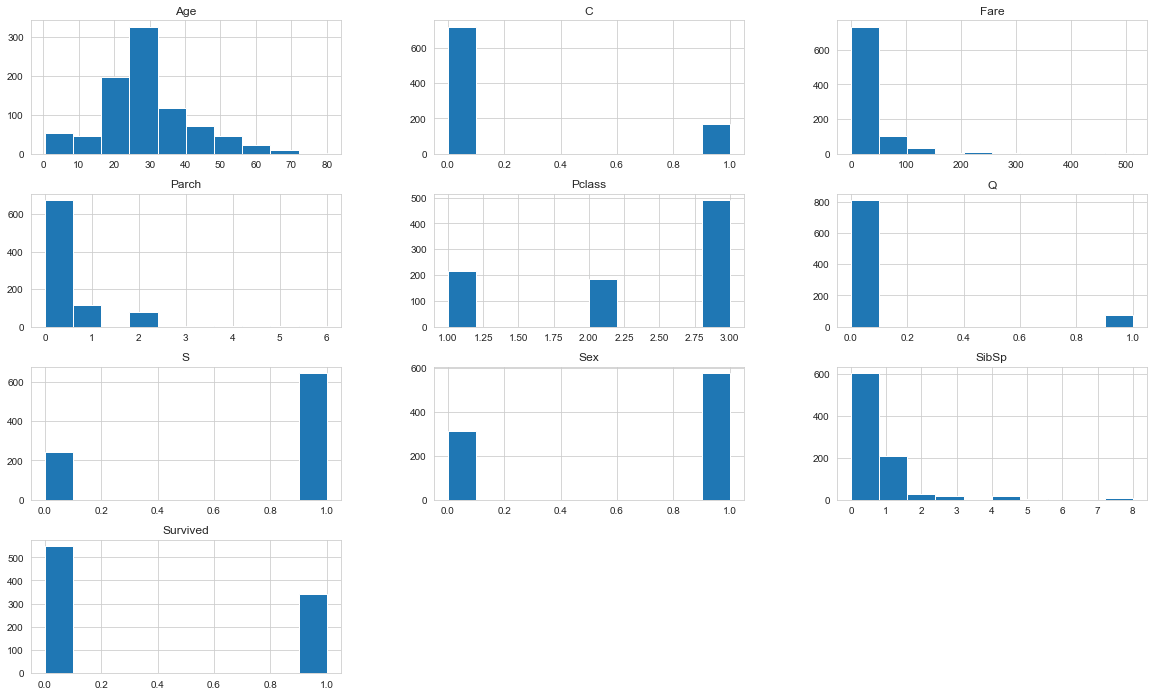

In [48]:
titanic_final.hist(figsize=(20,12))

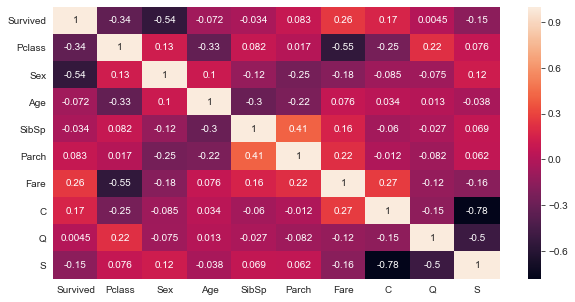

In [49]:
#Correlation heatmap to visualize relationships between variables
plt.figure(figsize=(10,5))
ax = sb.heatmap(titanic_final.corr(), annot=True)
ax.set_ylim(10,0)
plt.show()

- I can say for certain now that there is a direct (negative) correlation between passengers socio-economic class and fare prices. i.e., the higher the passenger class (3 - lower, 2 - middle, 1 - upper), the lower the fare price.

- Also worth pointing out that there is a negative correlation between Sex and Survived as we have duly noted that more males (1) did not survive (0).

###### Model Creation and Training

This is a supervised machine learning case-study and it is a classification problem as there are only two possible binary outcomes - Survived (0) & Not Survived (0). Some ML models I would use to before determining the most suitable include:
- Logistic Regression
- Decision Tree
- Random Forest
- XGBoost
- Multilayer Perceptrons

In [50]:
#importing packages to test the accuracy of each model
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

In [51]:
# Creating empty lists to append the results of each model to
ml_model = []
train_accuracy = []
test_accuracy = []

#storing the results
def results(model, train, test):
    ml_model.append(model)
    train_accuracy.append(round(train, 4))
    test_accuracy.append(round(test, 4))

### **Logistic Regression Classifier**
 Logistic Regression classifier in suoervised machine learning methods and it is mainly used for classification tasks. It is a classification model widely used if the target variable is categorical in nature and has a binary output [0 or 1] (i.e. belonging to one class or the other).

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
#Defining the predictants and the predictor
x = titanic_final.drop('Survived',axis=1)
y = titanic_final['Survived']
x.shape, y.shape

((889, 9), (889,))

In [54]:
#Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 200)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((711, 9), (178, 9), (711,), (178,))

In [55]:
x_train[0:5]

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
719,2.0,0.0,6.0,0.0,1.0,33.0000,0.0,0.0,1.0
165,1.0,0.0,24.0,0.0,1.0,55.0000,0.0,0.0,1.0
879,3.0,1.0,33.0,0.0,0.0,7.8958,0.0,0.0,1.0
451,1.0,1.0,30.0,0.0,0.0,27.7500,1.0,0.0,0.0
181,3.0,1.0,9.0,4.0,2.0,31.3875,0.0,0.0,1.0


In [56]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
#predicting the target variable
y_pred_test_LogReg = LogReg.predict(x_test)
y_pred_train_LogReg = LogReg.predict(x_train)

In [58]:
#Accuracy of the model
y_pred_test_acc_LogReg = accuracy_score(y_test,y_pred_test_LogReg)
y_pred_train_acc_LogReg = accuracy_score(y_train,y_pred_train_LogReg)

print("Accuracy on test Data: {:.4f}%".format(y_pred_test_acc_LogReg * 100))
print("Accuracy on training Data: {:.4f}%".format(y_pred_train_acc_LogReg * 100))

Accuracy on test Data: 82.5843%
Accuracy on training Data: 79.7468%


In [59]:
print(classification_report(y_test, y_pred_test_LogReg))

              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87       109
         1.0       0.84      0.68      0.75        69

    accuracy                           0.83       178
   macro avg       0.83      0.80      0.81       178
weighted avg       0.83      0.83      0.82       178



In [60]:
cm = confusion_matrix(y_test, y_pred_test_LogReg)
pd.DataFrame(cm,columns=['0','1'],index=['0','1'])

,0,1
0,100,9
1,22,47


In [61]:
y_test.value_counts()

0.0    109
1.0     69
Name: Survived, dtype: int64

###### Making a test prediction

In [62]:
x_test[0:1]
#to get an idea of what the dataset looks like before creating a 'test' passenger

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
45,3.0,1.0,32.0,0.0,0.0,8.05,0.0,0.0,1.0


In [63]:
test_passenger = np.array([3, 1, 24, 2, 2, 10, 0, 1, 0]).reshape(1,-1)

print(LogReg.predict(test_passenger)) #1 or 0 - if passenger survives
pd.DataFrame(LogReg.predict_proba(test_passenger),columns=[0,1], index=['Survive?']) #probability of both outcomes

[0.]


,0,1
Survive?,0.926562,0.073438


##### Storing the result

In [64]:
#storing the results. The below mentioned order of parameter passing is important.
#def results(model, train, test)
results('Logistic Regression', y_pred_train_acc_LogReg, y_pred_test_acc_LogReg)

### **Decision Tree Classifier**
 Decision tree algorithms are supervised machine learning methods used to make predicitions from nonlinear data. They are appropriate for continuous input and output variables (Regression) and catgeorical input and output variables (Classification -like in this case).

They deploy binary splitting to segment the predictor space into non overlapping regions and make predictions by using the mean or mode of the training observation. They eventually use splitting rules (If/Else conditions) to summarize the tree.

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
DecTree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state = 0)
DecTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [67]:
#predicting the target variable
y_pred_test_DecTree = DecTree.predict(x_test)
y_pred_train_DecTree = DecTree.predict(x_train)

In [68]:
#Accuracy of the model
y_pred_test_acc_DecTree = accuracy_score(y_test,y_pred_test_DecTree)
y_pred_train_acc_DecTree = accuracy_score(y_train,y_pred_train_DecTree)

print("Accuracy on test Data: {:.4f}%".format(y_pred_test_acc_DecTree * 100))
print("Accuracy on training Data: {:.4f}%".format(y_pred_train_acc_DecTree * 100))

Accuracy on test Data: 84.2697%
Accuracy on training Data: 82.5598%


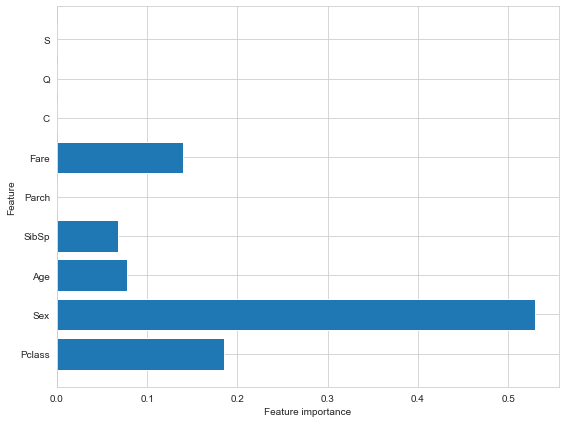

In [69]:
#The most important features the model used to predict
plt.figure(figsize=(9,7))
n_features = x_train.shape[1]
plt.barh(range(n_features), DecTree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), x_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [70]:
results('Decision Tree', y_pred_train_acc_DecTree, y_pred_test_acc_DecTree)

### **Random Forest Classifier**
 A Random Forest classifier algorithm is an ensemble machine learning model that combines several base models to produce one optimal predictive model. They combine decisions from multiple models to create a single model that is more powerful and reliable than its individual component parts. The aim is to improve overall performance.

Random Forests use Decision Trees to from ensembles. When predicting a value for a target feature, each tree uses a regression or classification to generate a vlue that serves as a vote, the RF algorithm then takes an average of all the votes from all the trees in the ensemble. (This average is the predicted value of the target feature of the variable)

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
RandFor = RandomForestClassifier(n_estimators = 200, criterion='entropy', random_state = 0)
RandFor.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [73]:
#predicting the target variable
y_pred_test_RandFor = RandFor.predict(x_test)
y_pred_train_RandFor = RandFor.predict(x_train)

In [74]:
#Accuracy of the model
y_pred_test_acc_RandFor = accuracy_score(y_test, y_pred_test_RandFor)
y_pred_train_acc_RandFor = accuracy_score(y_train, y_pred_train_RandFor)

print("Accuracy on test Data: {:.4f}%".format(y_pred_test_acc_RandFor * 100))
print("Accuracy on training Data: {:.4f}%".format(y_pred_train_acc_RandFor * 100))

Accuracy on test Data: 85.3933%
Accuracy on training Data: 97.8903%


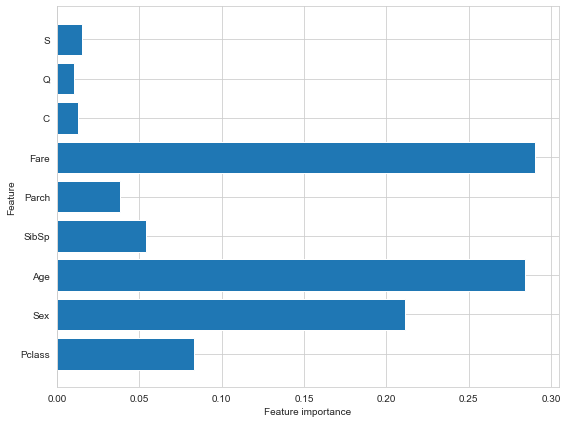

In [75]:
#The most important features the model used to predict
plt.figure(figsize=(9,7))
n_features = x_train.shape[1]
plt.barh(range(n_features), RandFor.feature_importances_, align='center')
plt.yticks(np.arange(n_features), x_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [76]:
results('Random Forest', y_pred_train_acc_RandFor, y_pred_test_acc_RandFor)

### **XGBoost Classifier**
eXtreme Gradient Boosting implements the gradient boosting decision tree algorithm. Gradient boosting is an approach where new models are created that predict the residuals and/or errors of prior models to make a final prediction. The majpr reason for implementing XGBoost is for execution speed and model performance.

In [77]:
from xgboost import XGBClassifier

In [78]:
xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(x_train, y_train)

[00:43:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [79]:
#predicting the target variable
y_pred_test_xgb = xgb.predict(x_test)
y_pred_train_xgb = xgb.predict(x_train)

C:\Users\Raimi Anda\Anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [80]:
#Accuracy of the model
y_pred_test_acc_xgb = accuracy_score(y_test, y_pred_test_xgb)
y_pred_train_acc_xgb = accuracy_score(y_train, y_pred_train_xgb)

print("Accuracy on test Data: {:.4f}%".format(y_pred_test_acc_xgb * 100))
print("Accuracy on training Data: {:.4f}%".format(y_pred_train_acc_xgb * 100))

Accuracy on test Data: 82.5843%
Accuracy on training Data: 96.7651%


In [81]:
results('XGBoost', y_pred_train_acc_xgb, y_pred_test_acc_xgb)

### **Multilayer Perceptrons**
Multilayer perceptrons also known as Linear Binary CLassifiers are neural networks with multiple layers that outputs a binary response variable. MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

In [82]:
from sklearn.neural_network import MLPClassifier

In [83]:
mp = MLPClassifier(max_iter=300, solver = 'lbfgs', hidden_layer_sizes=([100,100,100]), random_state= 10)
mp.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[100, 100, 100], learning_rate='constant',
              learning_rate_init=0.001, max_iter=300, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=10, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [84]:
#predicting the target variable
y_pred_test_mp = mp.predict(x_test)
y_pred_train_mp = mp.predict(x_train)

In [85]:
#Accuracy of the model
y_pred_test_acc_mp = accuracy_score(y_test, y_pred_test_mp)
y_pred_train_acc_mp = accuracy_score(y_train, y_pred_train_mp)

print("Accuracy on test Data: {:.4f}%".format(y_pred_test_acc_mp * 100))
print("Accuracy on training Data: {:.4f}%".format(y_pred_train_acc_mp * 100))

Accuracy on test Data: 80.8989%
Accuracy on training Data: 81.9972%


In [86]:
results('Multilayer Perceptrons', y_pred_train_acc_mp, y_pred_test_acc_mp)

##### Analyzing accuracy scores of the models

In [87]:
results = pd.DataFrame({ 'Model': ml_model,    
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy})
results

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.7975,0.8258
1,Decision Tree,0.8256,0.8427
2,Random Forest,0.9789,0.8539
3,XGBoost,0.9677,0.8258
4,Multilayer Perceptrons,0.8200,0.8090


In [88]:
#Sorting to find best model
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,Model,Train Accuracy,Test Accuracy
2,Random Forest,0.9789,0.8539
1,Decision Tree,0.8256,0.8427
3,XGBoost,0.9677,0.8258
0,Logistic Regression,0.7975,0.8258
4,Multilayer Perceptrons,0.8200,0.8090


In [89]:
#saving the best model
import pickle
with open("RandFor_Titanic.pkl", 'wb') as file:
    pickle.dump(RandFor, file)

In [90]:
#importing the model to make a test prediction
def passenger_fate(passenger):
    
    """passenger argument should be a list with 10 features in this order
    ['name', Pclass, sex, age, SibSp, Parch, Fare, C, Q, S]
    sex = 1 - male, 0 - female"""
    
    with open("RandFor_Titanic.pkl",'rb') as file:
        model = pickle.load(file)
    final_result = model.predict(np.array(passenger[1:]).reshape(1,-1))
    if final_result == 0:
        print(passenger[0].title() + " would not survive :(")
    else:
        print(passenger[0].title() + " would survive!")

In [91]:
#testing
new_passenger = ['james brackley', 0, 1, 52, 0, 0, 500, 0, 0, 1]
passenger_fate(new_passenger)

James Brackley would not survive :(


In [92]:
#predicting the survival of all passengers using the 'test.csv' dataset provided by Kaggle
titanic_test = pd.read_csv('test.csv')

In [93]:
#function to clean the test data
def clean_csv(file):
    file = file.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
    file['Age'] = file[['Age', 'Parch']].apply(age_approx, axis=1)
    file.dropna(inplace=True)
    file.reset_index(inplace=True, drop=True)
    file['Sex'] = label_encoder.fit_transform(file['Sex'])
    file['Embarked'] = file['Embarked'].astype(str)
    embarked_cat = file['Embarked']
    embarked_encoded = label_encoder.fit_transform(embarked_cat)
    embarked_1hot_mat = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1)).toarray()
    embarked_df = pd.DataFrame(embarked_1hot_mat, columns = ['C', 'Q', 'S'])
    test_final = pd.concat([file, embarked_df], axis=1, verify_integrity=True)
    test_final.drop(['Embarked'], axis=1, inplace=True)
    test_final[['Pclass','Sex','SibSp','Parch']] = test_final[['Pclass','Sex','SibSp','Parch']].astype(float)
    return test_final

In [94]:
def test_model(data):
    with open("RandFor_Titanic.pkl",'rb') as file:
        model = pickle.load(file)
    final_result = model.predict(data)
    output = data
    output['Survived?'] = final_result.reshape(-1,1)
    return output

In [95]:
test_model(clean_csv(titanic_test))

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Survived?
0,3.0,1.0,34.5,0.0,0.0,7.8292,0.0,1.0,0.0,0.0
1,3.0,0.0,47.0,1.0,0.0,7.0000,0.0,0.0,1.0,0.0
2,2.0,1.0,62.0,0.0,0.0,9.6875,0.0,1.0,0.0,0.0
3,3.0,1.0,27.0,0.0,0.0,8.6625,0.0,0.0,1.0,1.0
4,3.0,0.0,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
412,3.0,1.0,32.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0
413,1.0,0.0,39.0,0.0,0.0,108.9000,1.0,0.0,0.0,1.0
414,3.0,1.0,38.5,0.0,0.0,7.2500,0.0,0.0,1.0,0.0
415,3.0,1.0,32.0,0.0,0.0,8.0500,0.0,0.0,1.0,0.0
